In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

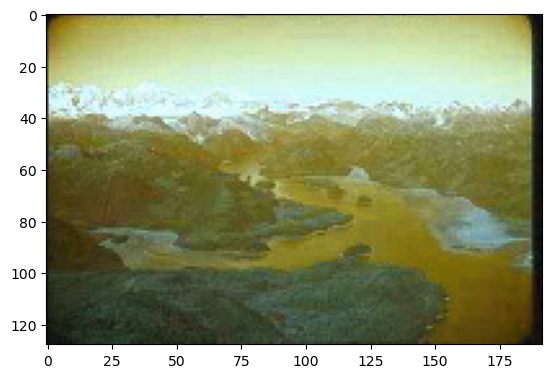

In [2]:
img_bgr = cv2.imread("public/images/scenary_img.jpg", 1)
plt.imshow(img_bgr)
plt.show()

# Image Negative

In [3]:
def plot_histogram(img):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color = col)
        plt.xlim([0, 256])
    plt.show()

height: 128, width: 192, channels: 3


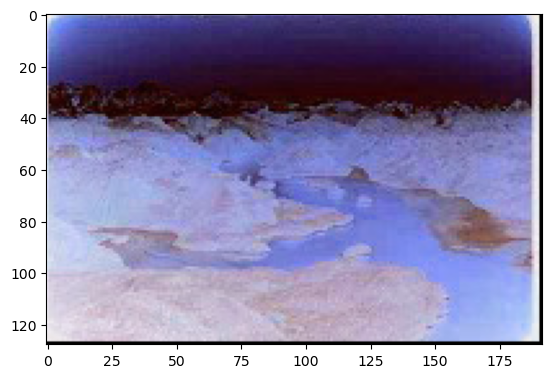

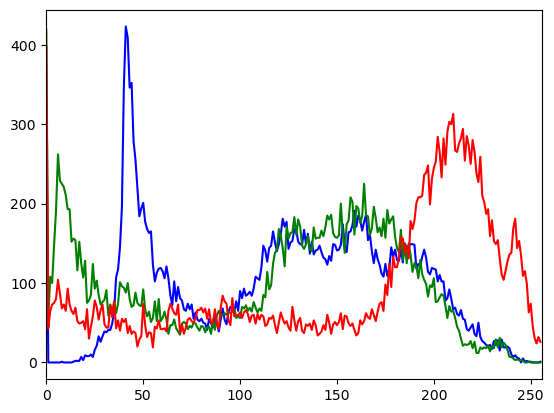

In [4]:
height, width, channels = img_bgr.shape

print(f"height: {height}, width: {width}, channels: {channels}")
img_bgr_new = np.zeros_like(img_bgr)
for i in range(height - 1):
    for j in range(width - 1):
        pixel = img_bgr[i, j]
        # print(pixel)

        pixel[0], pixel[1], pixel[2] = 255 - pixel[0], 255 - pixel[1], 255 - pixel[2]
        img_bgr_new[i, j] = pixel

plt.imshow(img_bgr_new)
plt.show()
plot_histogram(img_bgr_new)

## 2. Contrast Stretching

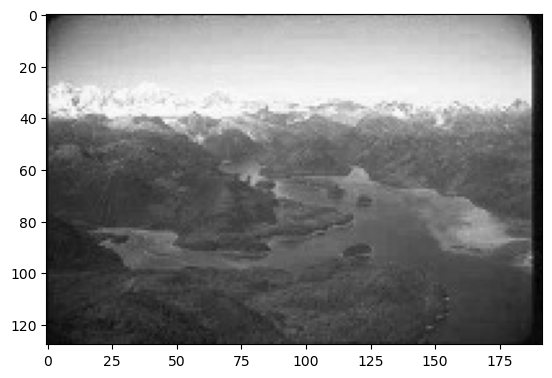

In [21]:
# Method 1: Manual Implementation
img_gray = cv2.imread("public/images/scenary_img.jpg", 0)
plt.imshow(img_gray, cmap="gray")

min_val = np.min(img_gray)
max_val = np.max(img_gray)

img_gray_new = ((img_gray.astype(float) - min_val) / (max_val - min_val)) * 255
img_gray_new = np.uint8(np.clip(img_gray_new, 0, 255))

original:
[[13 16 19 ... 21 16 22]
 [19 13 21 ... 16 18 17]
 [17 17 46 ... 20 12 20]
 ...
 [21 23 24 ... 18 18 15]
 [17 18 22 ... 17 17 16]
 [20 17 19 ... 12 15 19]],

stretched:
[[ 7 10 13 ... 15 10 16]
 [13  7 15 ... 10 12 11]
 [11 11 40 ... 14  6 14]
 ...
 [15 17 18 ... 12 12  9]
 [11 12 16 ... 11 11 10]
 [14 11 13 ...  6  9 13]]


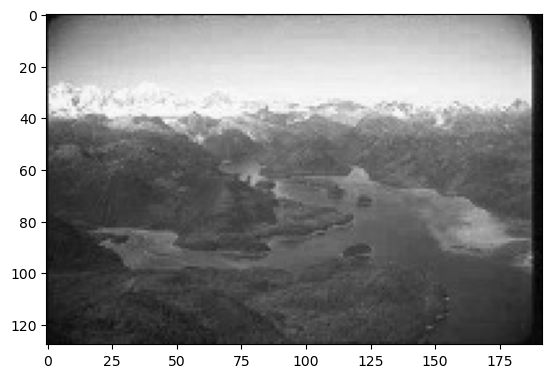

In [29]:
plt.imshow(img_gray_new, cmap="gray")
print(f"original:\n{img_gray},\n\nstretched:\n{img_gray_new}")